In [1]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
  import os
  CWD = '/content/drive/MyDrive/DataSources/SkinCare'
  os.chdir(CWD)
except:None
G_path = './Project_Data'

In [2]:
import pandas as pd
import os
import pickle
import matplotlib.pyplot as plt
import torch.nn.functional as F
pd.options.display.max_colwidth = 300
import features
from features.usefull_functions import *
from features.NETs import *
from features.Model_Training import *

In [3]:
grid_label = ['CNN_280x210','Jun22'] #[CNN_280x210_MultiClassModel0_24_Jun22_22-38]
# grid_label = ['A_E_CNN','A_E_CNN_Model6_22_Jun22_00-29']

models_list = os.listdir(G_path  + '/08_Saved_Models_Outpus/Grid_Search_Results/')
models_list = [i for i in models_list if all(s in i for s in grid_label)]
len(models_list)

134

Mode:  Grid_All_CNN_280x210_MultiClass24_Jun22_22-38
Hyper params:      {'Drop': 0.2, 'LR': 0.0011, 'Momentum': 0.77, 'Net': <class 'features.NETs.CNN_Nets.Net8_b'>, 'batch_size': 24, 'epochs': 100, 'loss_func': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'opt_func': <class 'torch.optim.sgd.SGD'>, 'patience': 20, 'weight_decay': 0.001}
Name: hyper_param, dtype: object
Test Accuracy  0.6535626535626535
Simple Avg. Test recall:  0.6497791023842917
Balanced test Recall :  0.6095238095238095


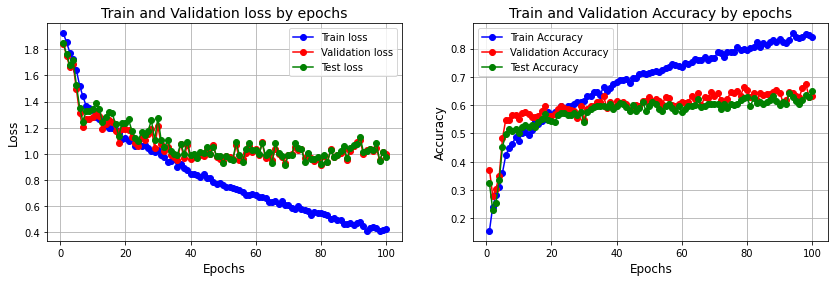

Mode:  CNN_280x210_Model5_23_Jun22_12-55
Hyper params:      {'Drop': 0.2, 'LR': 0.0013, 'Momentum': 0.76, 'Net': <class 'features.NETs.CNN_Nets.Net8_b'>, 'batch_size': 24, 'epochs': 100, 'loss_func': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'opt_func': <class 'torch.optim.sgd.SGD'>, 'patience': 20, 'weight_decay': 0.0012}
Name: hyper_param, dtype: object
Test Accuracy  0.6412776412776413
Simple Avg. Test recall:  0.6715260524499655
Balanced test Recall :  0.619047619047619


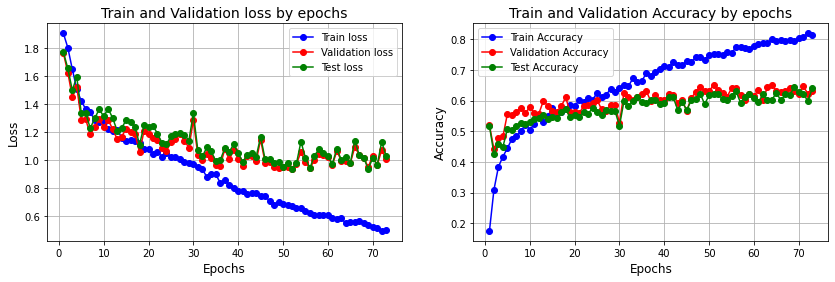

Mode:  CNN_280x210_MultiClassModel0_24_Jun22_22-38
Hyper params:      {'Drop': 0.2, 'LR': 0.0011, 'Momentum': 0.77, 'Net': <class 'features.NETs.CNN_Nets.Net8_b'>, 'batch_size': 24, 'epochs': 100, 'loss_func': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'opt_func': <class 'torch.optim.sgd.SGD'>, 'patience': 20, 'weight_decay': 0.001}
Name: hyper_param, dtype: object
Test Accuracy  0.6535626535626535
Simple Avg. Test recall:  0.6497791023842917
Balanced test Recall :  0.6095238095238095


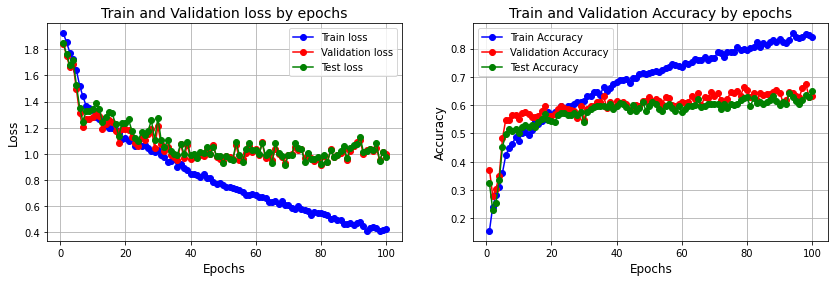

In [7]:
for m in models_list:
    # print('Mode: ', m)
    GridSrach = pickle.load(open(G_path  + '/08_Saved_Models_Outpus/Grid_Search_Results/' + m , 'rb'))
    details_ = GridSrach.iloc[[0]]
    if 0.7 > (details_.test_recall[0] + details_.test_accuracy[0]) / 2 > 0.65:
    
    # if m:   
        print('Mode: ', m)
        print('Hyper params: ', details_.hyper_param.iloc[[0]])
        # print('Test overall Metric ', details_.test_overall_metric[0])
        print('Test Accuracy ', details_.test_accuracy[0])
        print('Simple Avg. Test recall: ', details_.test_recall[0])
        print('Balanced test Recall : ', details_.blc_test_recall[0])
        plot_grid_results(details_)

In [ ]:
path_ = G_Models + '/CNN_280x210/'
path_ = G_Models +  '/Grid_Search_Models/'
model_list = os.listdir(path_)
model_list = [i for i in model_list if 'Model' in i]
X = input_data[2]
Y = labels[2]
X_blc = Evaluation_set[0]
Y_blc = Evaluation_set[1]

for m in model_list:
    model_ = pickle.load(open(path_+ m , 'rb') )
    Y_pred = model_.forward_noDrop(X).argmax(dim=1)
    Y_pred_blc = model_.forward_noDrop(X_blc).argmax(dim=1)
    test_accuracy = sk.metrics.accuracy_score(Y, Y_pred )
    test_accurac_blc = sk.metrics.accuracy_score(Y_blc, Y_pred_blc )
    print('Model Name:\n' , m) 
    print('Test Accuracy:\n' , test_accuracy)
    print('Balanced Test Accuracy:\n' , test_accurac_blc)
    print('----------------------------------')

In [8]:
sys.stdout.write("%s[%s%s] %i/%i\r" % ("", u"█"*100, "."*(100), 10, 200))

210

In [9]:
sys.stdout.write('still working...\n')

still working...


17

In [11]:
sys.stdout.write("%s[%s%s]" % ('a','b','c'))

a[bc]

5

In [14]:
loss =1
print("initializing", end="\r")
# ...
print("fetching data", end="\r")
# ...
for train_step in range(1000):
  # ...
  print("training | step:", train_step, "| loss:", loss, end="\r")
# ...
# print("accuracy", accuracy)
train_step()

TypeError: 'int' object is not callable